# Przybliżenie Padé vs. szereg Taylora


## Instalacja wymaganych pakietów


In [1]:
using Pkg
Pkg.add(["Polynomials", "TaylorSeries", "Plots", "LaTeXStrings"])

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`


In [2]:
using Polynomials
using TaylorSeries
using Plots
using LaTeXStrings

## Przykład 1: Funkcja tangens

Funkcja tangens jest dobrym przykładem funkcji, która posiada osobliwości (bieguny) w punktach $\frac{\pi}{2} + n\pi$ dla $n \in \mathbb{Z}$. Rozwinięcie w szereg Taylora wokół punktu $x=0$ ma ograniczony promień zbieżności (do najbliższej osobliwości, czyli $\frac{\pi}{2}$), podczas gdy przybliżenie Padé może zachowywać się lepiej poza tym obszarem.

In [3]:
# Definiujemy funkcję tangens
myfun(x) = tan(x)

# Przygotowujemy rozwinięcie Taylora wokół punktu x=0 z dokładnością do stopnia 9
t = Taylor1(Float64, 9)
myfun_taylor = myfun(t)

# Wypisujemy współczynniki szeregu Taylora
println("Współczynniki szeregu Taylora dla tan(x):\n", myfun_taylor.coeffs)

Współczynniki szeregu Taylora dla tan(x):
[0.0, 1.0, 0.0, 0.3333333333333333, 0.0, 0.13333333333333333, 0.0, 0.053968253968253964, 0.0, 0.0218694885361552]


In [4]:
# Konwertujemy na wielomian
myfun_t_pol = Polynomial(myfun_taylor.coeffs)
println("Wielomian Taylora dla tan(x):\n", myfun_t_pol)

Wielomian Taylora dla tan(x):
1.0*x + 0.333333*x^3 + 0.133333*x^5 + 0.0539683*x^7 + 0.0218695*x^9


In [5]:
# Tworzymy przybliżenie Padé [4/4] (licznik i mianownik stopnia 4)
using Polynomials.PolyCompat
myfun_pade = Polynomials.PolyCompat.PadeApproximation.Pade(myfun_t_pol, 4, 4)
println("Przybliżenie Padé [4/4] dla tan(x):\n", myfun_pade)

Przybliżenie Padé [4/4] dla tan(x):
{Float64, Float64}(Polynomial(0.0), Polynomial(1.0), :x)


## Porównanie przybliżeń

Narysujemy teraz wykres porównujący funkcję tangens z jej przybliżeniem Taylora i Padé. Przybliżenie Padé lepiej odwzorowuje zachowanie funkcji tan(x) w pobliżu osobliwości.

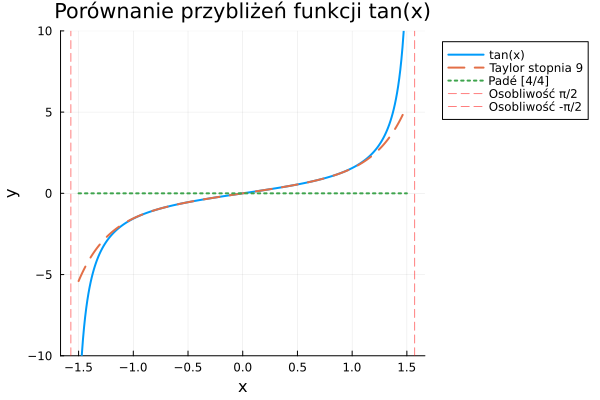

In [6]:
# Definiujemy zakres x dla wykresu
x_range = -1.5:0.01:1.5

# Obliczamy wartości funkcji i przybliżeń
y_exact = tan.(x_range)
y_taylor = myfun_t_pol.(x_range)
y_pade = [myfun_pade(x) for x in x_range]

# Tworzymy wykres
p = plot(x_range, y_exact, label="tan(x)", lw=2, legend=:outertopright, title="Porównanie przybliżeń funkcji tan(x)")
plot!(p, x_range, y_taylor, label="Taylor stopnia 9", lw=2, ls=:dash)
plot!(p, x_range, y_pade, label="Padé [4/4]", lw=2, ls=:dot)

# Ograniczamy zakres osi y dla lepszej wizualizacji
ylims!(p, -10, 10)
xlabel!("x")
ylabel!("y")

# Dodajemy pionowe linie oznaczające osobliwości funkcji tan(x)
vline!(p, [π/2], label="Osobliwość π/2", color=:red, ls=:dash, alpha=0.5)
vline!(p, [-π/2], label="Osobliwość -π/2", color=:red, ls=:dash, alpha=0.5)

p

Z powyższego wykresu widać, że:
1. Szereg Taylora dobrze przybliża funkcję tan(x) w okolicach punktu x=0, ale szybko zaczyna divergować w miarę zbliżania się do osobliwości π/2.
2. Przybliżenie Padé znacznie lepiej oddaje zachowanie funkcji tan(x) w szerszym zakresie i lepiej modeluje asymptotyczne zachowanie w pobliżu biegunów.

## Przykład 2: Funkcja $f(x) = exp(x)

Rozważmy teraz inny klasyczny przykład funkcji z osobliwościami: $f(x) = exp(x).

In [7]:
# Definiujemy funkcję f(x) = 1/(1+x^2)
f(x) = exp(x)

# Przygotowujemy rozwinięcie Taylora
t = Taylor1(Float64, 15)
f_taylor = f(t)

# Wypisujemy współczynniki szeregu Taylora
println("Współczynniki szeregu Taylora dla 1/(1+x^2):\n", f_taylor.coeffs)

Współczynniki szeregu Taylora dla 1/(1+x^2):
[1.0, 1.0, 0.5, 0.16666666666666666, 0.041666666666666664, 0.008333333333333333, 0.001388888888888889, 0.0001984126984126984, 2.48015873015873e-5, 2.7557319223985893e-6, 2.7557319223985894e-7, 2.505210838544172e-8, 2.08767569878681e-9, 1.6059043836821616e-10, 1.1470745597729726e-11, 7.647163731819817e-13]


In [8]:
# Konwertujemy na wielomian
arr = [1.0, 1.0, 0.5, 0.16666666666666666, 0.041666666666666664, 0.008333333333333333, 0.001388888888888889, 0.0001984126984126984, 2.48015873015873e-5, 2.7557319223985893e-6, 2.7557319223985894e-7, 2.505210838544172e-8, 2.08767569878681e-9, 1.6059043836821616e-10, 1.1470745597729726e-11, 7.647163731819817e-13]
f_t_pol = Polynomial(arr)
println("Wielomian Taylora dla 1/(1+x^2):\n", f_t_pol)

Wielomian Taylora dla 1/(1+x^2):
1.0 + 1.0*x + 0.5*x^2 + 0.166667*x^3 + 0.0416667*x^4 + 0.00833333*x^5 + 0.00138889*x^6 + 0.000198413*x^7 + 2.48016e-5*x^8 + 2.75573e-6*x^9 + 2.75573e-7*x^10 + 2.50521e-8*x^11 + 2.08768e-9*x^12 + 1.6059e-10*x^13 + 1.14707e-11*x^14 + 7.64716e-13*x^15


In [9]:
# Tworzymy różne przybliżenia Padé
f_pade_2_2 = Polynomials.PolyCompat.PadeApproximation.Pade(f_t_pol, 2, 2)
f_pade_4_4 = Polynomials.PolyCompat.PadeApproximation.Pade(f_t_pol, 4, 4)

println("Przybliżenie Padé [2/2] dla 1/(1+x^2):\n", f_pade_2_2)
println("\nPrzybliżenie Padé [4/4] dla 1/(1+x^2):\n", f_pade_4_4)

Przybliżenie Padé [2/2] dla 1/(1+x^2):
Pade{Float64, Float64}(Polynomial(1.0 + 0.5*x + 0.08333333333333333*x^2), Polynomial(1.0 - 0.5*x + 0.08333333333333333*x^2), :x)

Przybliżenie Padé [4/4] dla 1/(1+x^2):
Pade{Float64, Float64}(Polynomial(1.0 + 0.4999999999999983*x + 0.10714285714285614*x^2 + 0.011904761904761696*x^3 + 0.0005952380952380668*x^4), Polynomial(1.0 - 0.5000000000000018*x + 0.10714285714285793*x^2 - 0.011904761904762046*x^3 + 0.000595238095238105*x^4), :x)


### Porównanie z dokładną funkcją

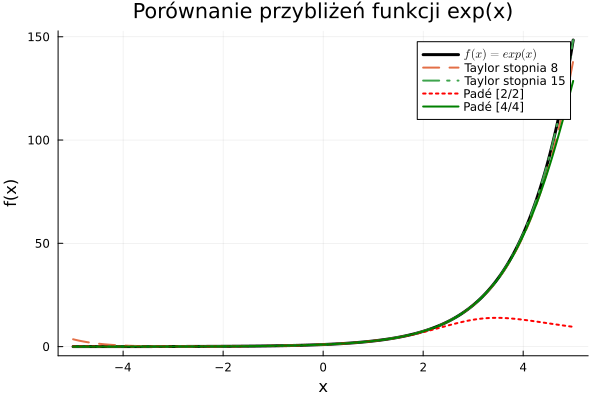

In [10]:
# Definiujemy szerszy zakres x dla wykresu
x_range_wide = -5:0.01:5

# Obliczamy wartości funkcji i przybliżeń
y_exact = f.(x_range_wide)
y_taylor_8 = Polynomial(f_taylor.coeffs[1:9]).(x_range_wide)  # Taylor stopnia 8
y_taylor_16 = f_t_pol.(x_range_wide)  # Taylor stopnia 15
y_pade_2_2 = [f_pade_2_2(x) for x in x_range_wide]
y_pade_4_4 = [f_pade_4_4(x) for x in x_range_wide]

# Tworzymy wykres
p2 = plot(x_range_wide, y_exact, label=L"f(x)=exp(x)", lw=3, color=:black, legend=:topright, title="Porównanie przybliżeń funkcji exp(x)")
plot!(p2, x_range_wide, y_taylor_8, label="Taylor stopnia 8", lw=2, ls=:dash)
plot!(p2, x_range_wide, y_taylor_16, label="Taylor stopnia 15", lw=2, ls=:dashdot)
plot!(p2, x_range_wide, y_pade_2_2, label="Padé [2/2]", lw=2, ls=:dot, color=:red)
plot!(p2, x_range_wide, y_pade_4_4, label="Padé [4/4]", lw=2, color=:green)

xlabel!("x")
ylabel!("f(x)")

p2

### Zobaczmy dokładniej błędy aproksymacji

┌ Warning: Invalid negative or zero value 0.0 found at series index 495 for log10 based yscale
└ @ Plots ~/.julia/packages/Plots/Ec1L1/src/utils.jl:106
┌ Warning: Invalid negative or zero value 0.0 found at series index 495 for log10 based yscale
└ @ Plots ~/.julia/packages/Plots/Ec1L1/src/utils.jl:106


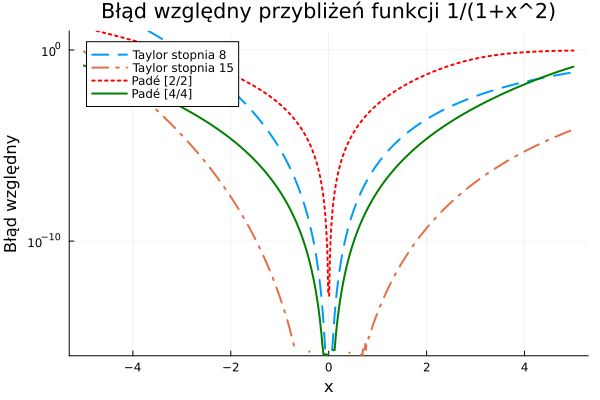

┌ Warning: Invalid negative or zero value 0.0 found at series index 495 for log10 based yscale
└ @ Plots ~/.julia/packages/Plots/Ec1L1/src/utils.jl:106


In [11]:
# Obliczamy błędy przybliżeń (w skali logarytmicznej dla lepszej widoczności)
errors_taylor_8 = abs.((y_taylor_8 .- y_exact) ./ y_exact)
errors_taylor_16 = abs.((y_taylor_16 .- y_exact) ./ y_exact)
errors_pade_2_2 = abs.((y_pade_2_2 .- y_exact) ./ y_exact)
errors_pade_4_4 = abs.((y_pade_4_4 .- y_exact) ./ y_exact)

# Zastępujemy wartości NaN i Inf
errors_taylor_8[isnan.(errors_taylor_8) .| isinf.(errors_taylor_8)] .= NaN
errors_taylor_16[isnan.(errors_taylor_16) .| isinf.(errors_taylor_16)] .= NaN
errors_pade_2_2[isnan.(errors_pade_2_2) .| isinf.(errors_pade_2_2)] .= NaN
errors_pade_4_4[isnan.(errors_pade_4_4) .| isinf.(errors_pade_4_4)] .= NaN

# Tworzymy wykres błędów
p_error = plot(x_range_wide, errors_taylor_8, yaxis=:log10, ylims=(1e-16, 10), 
               label="Taylor stopnia 8", lw=2, ls=:dash, legend=:topleft,
               title="Błąd względny przybliżeń funkcji 1/(1+x^2)")
plot!(p_error, x_range_wide, errors_taylor_16, label="Taylor stopnia 15", lw=2, ls=:dashdot)
plot!(p_error, x_range_wide, errors_pade_2_2, label="Padé [2/2]", lw=2, ls=:dot, color=:red)
plot!(p_error, x_range_wide, errors_pade_4_4, label="Padé [4/4]", lw=2, color=:green)

xlabel!("x")
ylabel!("Błąd względny")

p_error